In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import kNearestNeighbour
from sklearn.metrics import roc_curve

ImportError: cannot import name 'kNearestNeighbour' from 'sklearn.linear_model' (c:\Users\Cormac\anaconda3\envs\ML_env\lib\site-packages\sklearn\linear_model\__init__.py)

In [ ]:
#Import Censored Data
censored_df=pd.read_csv('censored_tweets.csv')
censored_df = pd.DataFrame(censored_df)
censored_df.insert(loc=3, column='y', value=0)
censored_df = censored_df.drop(['id','lang'],axis=1)

In [ ]:
#import regular tweets
uncensored_df=pd.read_csv('regular_tweets.csv')
uncensored_df = pd.DataFrame(uncensored_df)
uncensored_df.insert(loc=3, column='y', value=1)
uncensored_df = uncensored_df.drop(['id','lang'],axis=1)

In [ ]:
#merge and shufflem
df = pd.concat([censored_df, uncensored_df], ignore_index=True, sort=False)
df = shuffle(df)

In [ ]:
df_x=df["text"]
df_y=df["y"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=4)

In [ ]:
cv = CountVectorizer(min_df = 1, stop_words='english', lowercase='True')

x_traincv=cv.fit_transform(x_train)
x_testcv=cv.transform(x_test)
x_traincv.shape

arr = x_traincv.toarray()
arr = arr.flatten()
sortedarr = sorted(arr, reverse=True)
print(sortedarr[0],sortedarr[1], sortedarr[2],sortedarr[3],sortedarr[4])

10 9 7 7 7


In [ ]:
cv.get_feature_names()

c:\Users\Cormac\anaconda3\envs\ML_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00',
 '000',
 '009lncdpbn',
 '00am',
 '00から予定しておりましたツアーグッズ先行販売ですが大勢のお客様にお待ち頂いている為',
 '01',
 '02',
 '03',
 '04',
 '048vidkxjk',
 '05',
 '05heoym7kc',
 '060',
 '07',
 '07dzz1ehyn',
 '09',
 '0asjxbpbsx',
 '0bhoc8itta',
 '0citfyzygs',
 '0dmyguckjk',
 '0dzour6i7r',
 '0eb5pwplak',
 '0engvwkesi',
 '0eril8qitm',
 '0ftk0odgzx',
 '0gjcro',
 '0helqaxnwh',
 '0ihvsb3hg3',
 '0javujehyy',
 '0kxotw3taz',
 '0lf2nyclqg',
 '0mvtw5aldd',
 '0ocow6rnzl',
 '0pbw8iwrfu',
 '0pduqrjyjv',
 '0sq1bd5xoa',
 '0t9jt0sd5j',
 '0v32dnycdy',
 '0w7yj8cnqi',
 '0zp9zbnkly',
 '10',
 '100',
 '1000',
 '10000',
 '1000s',
 '100m',
 '100s',
 '101',
 '102',
 '102m',
 '105',
 '107',
 '108',
 '10h',
 '10k',
 '10krc',
 '10th',
 '11',
 '110',
 '111',
 '1111',
 '116',
 '119',
 '11pm',
 '11street',
 '12',
 '120',
 '120db',
 '1240875616040205',
 '12pm',
 '12th',
 '12xpert',
 '12yr',
 '13',
 '130',
 '1310ad',
 '138',
 '13m',
 '13th',
 '14',
 '1400',
 '1414',
 '142',
 '14ilfloody',
 '14v8zj21bp',
 '14words',
 '14yr',
 '15',
 '150',
 '150

In [ ]:
cv.get_stop_words()

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [ ]:
y_train=y_train.astype('int')
y_test=y_test.astype('int')

In [ ]:
log_reg = LogisticRegression()

In [ ]:
log_reg.fit(x_traincv, y_train)

LogisticRegression()

In [ ]:
predictions=log_reg.predict(x_testcv)

In [ ]:
confusion_matrix(y_test, predictions)

array([[278,  72],
       [ 71, 357]], dtype=int64)

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80       350
           1       0.83      0.83      0.83       428

    accuracy                           0.82       778
   macro avg       0.81      0.81      0.81       778
weighted avg       0.82      0.82      0.82       778



In [ ]:
log_reg.score(x_testcv, y_test)

0.8161953727506427

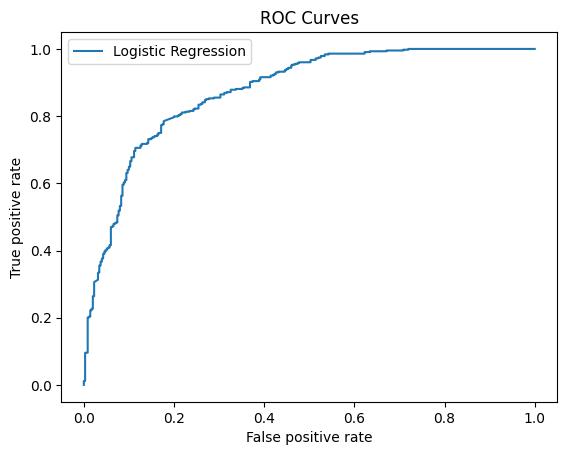

In [34]:
scores = log_reg.predict_proba(x_testcv)
fpr, tpr, _ = roc_curve(y_test, scores[:, 1])
plt.plot(fpr, tpr)

#Plot
plt.title('ROC Curves')
plt.xlabel('False positive rate'); plt.ylabel('True positive rate')
plt.legend(['Logistic Regression'])
plt.show()

In [ ]:
testSentence = ["The government are horrendous"]
sentenceTransformed=cv.transform(testSentence)
result = log_reg.predict_proba(sentenceTransformed)
print("This tweet has a: ", result[0,1], " chance of being censored.")
print("This tweet has a: ", result[0,0], " chance of being left uncensored.")

This tweet has a:  0.47198833140760993  chance of being censored.
This tweet has a:  0.5280116685923901  chance of being left uncensored.
